In [ ]:
import pandas as pd, numpy as np

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def open_db(db):
  return pd.read_csv(f'/content/drive/MyDrive/Topicos_A/Classificacao/{db}/class_{db.lower()}.csv')

## Dataset Titanic - Classificação

Este problema é baseado no evento fatídico do Titanic. Esta base de dados é usualmente utilizada para a criação de modelos que aprendam as características mais relevantes para a sobrevivência das pessoas.

Variáveis do problema:

$\bullet$ <b>survival</b>	- Survival:	0 = No, 1 = Yes;

$\bullet$ <b>pclass</b> -	Ticket class: 	1 = 1st, 2 = 2nd, 3 = 3rd

$\bullet$ <b>sex	</b> - Sexo da pessoa;

$\bullet$ <b>Age</b> - Idade, em anos;	

$\bullet$ <b>sibsp	</b> - # irmãos / companhia no Titanic;	

$\bullet$ <b>parch</b> -	# pais / filhos no Titanic;

$\bullet$ <b>ticket</b> -	Número de Ticket;

$\bullet$ <b>fare</b> -	Preço da passagem;	

$\bullet$ <b>cabin</b> -	Número da cabine;	

$\bullet$ <b>embarked</b> -	Porto de embarcação.	C = Cherbourg, Q = Queenstown, S = Southampton.


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
df = open_db('Titanic')

## 1) Observe as variáveis do problema Titanic. Existem atributos que potencialmente são irrelevantes? Justifique.

In [ ]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
 	#PassengerId - Não é relevante (não tem relação com o problema e não carrega nenhum tipo de informação)
  
  #Pclass - 1ª classe, 2ª classe, 3ª classe. - Provavelmente é relevante 
  
  #Name - Certamente não é relevante.
  
  #Sex - Prioridade mulher e crianças.
  
  #Age - Não é irrelevante
  
  #SibSp - Não é irrelevante	
  
  #Parch - Não é irrelevante
  
  #Ticket -	
  
  #Fare - Não é irrelevante
  
  #Cabin - Não parece relevante, mas pode ser transformado para algo útil
  
  #Embarked - Qual porto embarcou (?) - Não parece ser relevante. Queenstown foi um porto que embarcaram mais famílias -> Provavelmente tem mais crianças e mais marido/mulher 
  
  #Survived - Target do problema 

In [ ]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

2) Verifique se há inconsistências na base de dados.

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.isna().sum(axis=1)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

(array([183.,   0.,   0.,   0.,   0., 550.,   0.,   0.,   0., 158.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

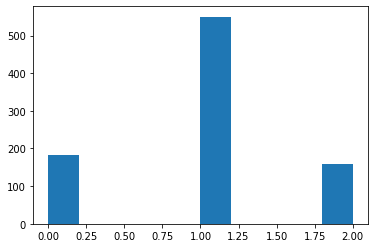

In [ ]:
plt.hist(df.isna().sum(axis=1).values)

In [ ]:
#df2 = pd.read_csv("/content/drive/MyDrive/Topicos_A/Classificacao/GermanCredit/class_german_bank.csv")
df2 = pd.read_csv('/content/drive/MyDrive/Topicos_A/Classificacao/Bank Marketing Data Set/class_bank.csv')
df2.isna().sum(axis=0)

In [ ]:
#df3 = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv',na_values='?')

Attribute Information:

  <b>1:  surgery?</b>

          1 = Yes, it had surgery
          2 = It was treated without surgery

  <b>2:  Age</b>

          1 = Adult horse
          2 = Young (< 6 months)

  <b>3:  Hospital Number</b>
  
          - numeric id
          - the case number assigned to the horse
            (may not be unique if the horse is treated > 1 time)

  <b>4:  rectal temperature</b>
  
          - linear
          - in degrees celsius.
          - An elevated temp may occur due to infection.
          - temperature may be reduced when the animal is in late shock
          - normal temp is 37.8
          - this parameter will usually change as the problem progresses
               eg. may start out normal, then become elevated because of
                   the lesion, passing back through the normal range as the
                   horse goes into shock
  <b>5:  pulse</b>

          - linear
          - the heart rate in beats per minute
          - is a reflection of the heart condition: 30 -40 is normal for adults
          - rare to have a lower than normal rate although athletic horses
            may have a rate of 20-25
          - animals with painful lesions or suffering from circulatory shock
            may have an elevated heart rate

  <b>6:  respiratory rate</b>

          - linear
          - normal rate is 8 to 10
          - usefulness is doubtful due to the great fluctuations

  <b>7:  temperature of extremities</b>

          - a subjective indication of peripheral circulation
          - possible values:
               1 = Normal
               2 = Warm
               3 = Cool
               4 = Cold
          - cool to cold extremities indicate possible shock
          - hot extremities should correlate with an elevated rectal temp.

  <b>8:  peripheral pulse</b>

          - subjective
          - possible values are:
               1 = normal
               2 = increased
               3 = reduced
               4 = absent
          - normal or increased p.p. are indicative of adequate circulation
            while reduced or absent indicate poor perfusion

  <b>9:  mucous membranes</b>

          - a subjective measurement of colour
          - possible values are:
               1 = normal pink
               2 = bright pink
               3 = pale pink
               4 = pale cyanotic
               5 = bright red / injected
               6 = dark cyanotic
          - 1 and 2 probably indicate a normal or slightly increased
            circulation
          - 3 may occur in early shock
          - 4 and 6 are indicative of serious circulatory compromise
          - 5 is more indicative of a septicemia

 <b>10: capillary refill time</b>

          - a clinical judgement. The longer the refill, the poorer the
            circulation
          - possible values
               1 = < 3 seconds
               2 = >= 3 seconds

 <b>11: pain - a subjective judgement of the horse's pain level</b>

          - possible values:
               1 = alert, no pain
               2 = depressed
               3 = intermittent mild pain
               4 = intermittent severe pain
               5 = continuous severe pain
          - should NOT be treated as a ordered or discrete variable!
          - In general, the more painful, the more likely it is to require
            surgery
          - prior treatment of pain may mask the pain level to some extent

 <b>12: peristalsis</b>

          - an indication of the activity in the horse's gut. As the gut
            becomes more distended or the horse becomes more toxic, the
            activity decreases
          - possible values:
               1 = hypermotile
               2 = normal
               3 = hypomotile
               4 = absent

 <b>13: abdominal distension</b>

          - An IMPORTANT parameter.
          - possible values
               1 = none
               2 = slight
               3 = moderate
               4 = severe
          - an animal with abdominal distension is likely to be painful and
            have reduced gut motility.
          - a horse with severe abdominal distension is likely to require
            surgery just tio relieve the pressure

 <b>14: nasogastric tube</b>

          - this refers to any gas coming out of the tube
          - possible values:
               1 = none
               2 = slight
               3 = significant
          - a large gas cap in the stomach is likely to give the horse
            discomfort

 <b>15: nasogastric reflux</b>

          - possible values
               1 = none
               2 = > 1 liter
               3 = < 1 liter
          - the greater amount of reflux, the more likelihood that there is
            some serious obstruction to the fluid passage from the rest of
            the intestine

 <b>16: nasogastric reflux PH</b>

          - linear
          - scale is from 0 to 14 with 7 being neutral
          - normal values are in the 3 to 4 range

 <b>17: rectal examination - feces</b>

          - possible values
               1 = normal
               2 = increased
               3 = decreased
               4 = absent
          - absent feces probably indicates an obstruction

 <b>18: abdomen</b>

          - possible values
               1 = normal
               2 = other
               3 = firm feces in the large intestine
               4 = distended small intestine
               5 = distended large intestine
          - 3 is probably an obstruction caused by a mechanical impaction
            and is normally treated medically
          - 4 and 5 indicate a surgical lesion

 <b>19: packed cell volume</b>

          - linear
          - the # of red cells by volume in the blood
          - normal range is 30 to 50. The level rises as the circulation
            becomes compromised or as the animal becomes dehydrated.

 <b>20: total protein</b>

          - linear
          - normal values lie in the 6-7.5 (gms/dL) range
          - the higher the value the greater the dehydration

 <b>21: abdominocentesis appearance</b>

          - a needle is put in the horse's abdomen and fluid is obtained from
            the abdominal cavity
          - possible values:
               1 = clear
               2 = cloudy
               3 = serosanguinous
          - normal fluid is clear while cloudy or serosanguinous indicates
            a compromised gut

 <b>22: abdomcentesis total protein</b>

          - linear
          - the higher the level of protein the more likely it is to have a
            compromised gut. Values are in gms/dL

 <b>23: outcome</b>

          - what eventually happened to the horse?
          - possible values:
               1 = lived
               2 = died
               3 = was euthanized

 <b>24: surgical lesion?</b>

          - retrospectively, was the problem (lesion) surgical?
          - all cases are either operated upon or autopsied so that
            this value and the lesion type are always known
          - possible values:
               1 = Yes
               2 = No

 </b>25, 26, 27: type of lesion</b>

          - first number is site of lesion
               1 = gastric
               2 = sm intestine
               3 = lg colon
               4 = lg colon and cecum
               5 = cecum
               6 = transverse colon
               7 = retum/descending colon
               8 = uterus
               9 = bladder
               11 = all intestinal sites
               00 = none
          - second number is type
               1 = simple
               2 = strangulation
               3 = inflammation
               4 = other
          - third number is subtype
               1 = mechanical
               2 = paralytic
               0 = n/a
          - fourth number is specific code
               1 = obturation
               2 = intrinsic
               3 = extrinsic
               4 = adynamic
               5 = volvulus/torsion
               6 = intussuption
               7 = thromboembolic
               8 = hernia
               9 = lipoma/slenic incarceration
               10 = displacement
               0 = n/a

 <b>28: cp_data</b>

          - is pathology data present for this case?
               1 = Yes
               2 = No
          - this variable is of no significance since pathology data
            is not included or collected for these cases

8. Missing values: 30% of the values are missing

In [ ]:
lst = ['surgery', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities',
       'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain', 'peristalsis', 'abdominal distension',
       'nasogastric tube', 'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination - feces', 'abdomen',
       'packed cell volume', 'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome',
       'target', 'lesion 1', ' lesion 2', ' lesion 3', 'cp_data']

Observe a base de dados. Existem dados faltantes?

In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', names=lst)

In [ ]:
df3

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination - feces,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,target,lesion 1,lesion 2,lesion 3,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,5,4,4,?,?,?,3,5,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,3,4,2,?,?,?,4,2,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,3,3,1,?,?,?,1,1,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,2,4,4,1,2,5.00,3,?,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,?,?,?,?,?,?,?,?,74.00,7.40,?,?,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,?,120,70,4,?,4,2,2,4,?,?,?,?,?,5,55,65,?,?,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,4,3,3,3,1,?,4,4,44.00,?,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,4,4,3,2,1,?,3,5,60.00,6.80,?,?,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,3,3,3,3,1,?,4,4,50.00,6.00,3,3.40,1,1,2208,0,0,1


In [ ]:
#df3.isna().sum(axis=0)

In [ ]:
df3.replace('?',np.nan)

Por mais que saibamos que os dados são faltantes, a tabela não reconhece que eles são de fato faltantes. Devemos importar corretamente a tabela, usando o argumento <b>na_values</b>

In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv',na_values='?', names=lst)
df_test = pd.read_csv('/content/drive/MyDrive/Topicos_A/horseTest.csv')


NameError: ignored

In [ ]:
#df_test

In [ ]:
df3

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination - feces,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,target,lesion 1,lesion 2,lesion 3,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,5.0,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,4.0,3.0,3.0,3.0,1.0,NaN,4.0,4.0,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,2.0,1.0,NaN,3.0,5.0,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0,NaN,4.0,4.0,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [ ]:
df3.isna().sum(axis=0)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
def run_model(df):
  ix = [i for i in df.columns if i != 'target']

  X, y = df[ix].values, df['target'].values

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

  RF = RandomForestClassifier()

  RF.fit(X_train,y_train)
  y_pred = RF.predict(X_val)

  reports = classification_report(y_val, y_pred)
  #print(reports)
  cm = confusion_matrix(y_val, y_pred)
  #print(cm)        

  acc = accuracy_score(y_val, y_pred)

  return acc

In [ ]:
#strategy = 'mean','most frequent', 'median', 'constant' (precisa de fill_value)


# Preenchimento "estatístico" (média, mediana, moda)

In [ ]:
#run_model(df3)

(array([ 6., 26., 35., 48., 43., 34., 31., 15.,  9., 13.,  9.,  4.,  3.,
         5.,  5.,  2.,  4.,  4.,  0.,  4.]),
 array([ 0.  ,  0.95,  1.9 ,  2.85,  3.8 ,  4.75,  5.7 ,  6.65,  7.6 ,
         8.55,  9.5 , 10.45, 11.4 , 12.35, 13.3 , 14.25, 15.2 , 16.15,
        17.1 , 18.05, 19.  ]),
 <a list of 20 Patch objects>)

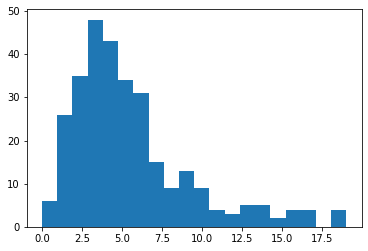

In [ ]:
plt.hist(df3.isna().sum(axis=1), bins=20)

In [ ]:
#strategy = 'mean','most_frequent', 'median', 'constant' (precisa de fill_value)

imputer = SimpleImputer(strategy='mean')
new_df = pd.DataFrame(imputer.fit_transform(df3), columns=lst)
r = run_model(new_df)

In [ ]:
r_ = 0

n_times = 100
for i in range(n_times):
  r = run_model(new_df)
  r_ += r   #Acumula a acurácia

r_/n_times   #Divide para fazer a média.

0.8725252525252514

KNN - Explicação

Algoritmo que busca, na base de dados, os registros mais próximos. 

In [ ]:
#df3

In [ ]:

#KNN Imputer 
#n_neighbors
#weights

imputer = KNNImputer()
new_df = pd.DataFrame(imputer.fit_transform(df3), columns=lst)
#new_df.isna().sum(axis=0)
r = run_model(new_df)

In [ ]:
r_ = 0
n_times = 100
for i in range(n_times):
  r = run_model(new_df)
  r_ += r   #Acumula a acurácia

r_/n_times #Divide para fazer a média.

0.8585858585858585

In [ ]:
imputer = IterativeImputer()
new_df = pd.DataFrame(imputer.fit_transform(df3), columns=lst)


In [ ]:
r_ = 0

n_times = 100
for i in range(n_times):
  r = run_model(new_df)
  r_ += r   #Acumula a acurácia

r_/n_times   #Divide para fazer a média.

0.8366666666666664